<a href="https://colab.research.google.com/github/lns0061/legendary-adventure/blob/main/9_%D0%BF%D1%80%D0%BE%D0%B3%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

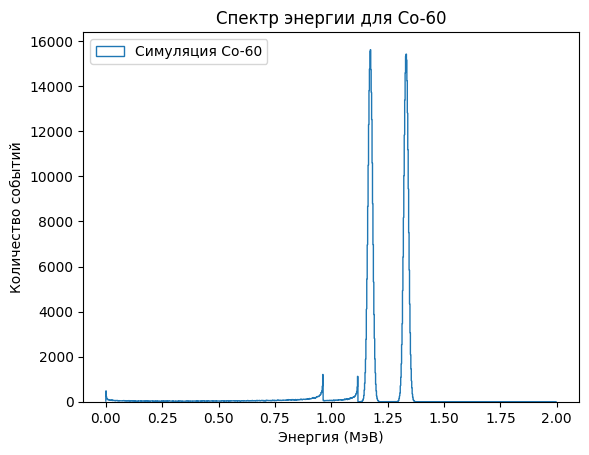

Время выполнения: 7.493930816650391 секунд.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from multiprocessing import Pool, cpu_count
import time

# Параметры детектора и источника
R = 5.0  # Радиус детектора в см
D = 10.0  # Высота детектора в см
X0, Y0, Z0 = 2.0, 2.0, 3.0  # Координаты источника

# Параметры источника Co-60
energy_peaks_Co60 = [1.173, 1.332]  # Основной пик энергии в МэВ для Co-60
# Можно менять для любых изотопов, главное чтобы энергетические пики входили в интервал

# Количество энергетических групп
energy_groups = 1024
max_energy = 2.0  # Максимальная энергия в МэВ для моделирования
energy_bins = np.linspace(0, max_energy, energy_groups)

electron_mass = 0.511  # масса электрона в МэВ

def compton_scatter(E_gamma):
    theta = np.random.uniform(0, np.pi)  # Случайный угол рассеяния
    E_e = E_gamma * (1 - 1/(1 + (E_gamma / electron_mass) * (1 - np.cos(theta))))  # Формула Комптона
    return E_e

def model_simulation(seed):
    np.random.seed(seed)
    energies = []
    for peak in energy_peaks_Co60:
        num_events = int(1e5)
        energies += list(np.random.normal(peak, 0.01, num_events))

        scatter_fraction = 0.1
        scattered = num_events * scatter_fraction
        for _ in range(int(scattered)):
            energies.append(compton_scatter(peak))
    return energies

if __name__ == "__main__":
    start_time = time.time()

    num_cores = cpu_count()
    pool = Pool(num_cores)
    num_simulations = num_cores

    seeds = np.random.randint(0, 1e6, num_simulations)

    results = pool.map(model_simulation, seeds)
    pool.close()
    pool.join()

    combined_energies = [energy for result in results for energy in result]

    plt.hist(combined_energies, bins=energy_bins, histtype='step', label='Симуляция Co-60')
    plt.xlabel('Энергия (МэВ)')
    plt.ylabel('Количество событий')
    plt.title('Спектр энергии для Co-60')
    plt.legend()
    plt.show()

    print(f"Время выполнения: {time.time() - start_time} секунд.")